
### Machine Learning Nanodegree
### Capstone Project : Finding Fraud Payments

### Exploring Data
The data file is payments.csv and it contains payment transactions. The datafile contains 11 columns and isFraud is a target label. The isFraud indicates whether the payment transaction is fraud or not.


In [1]:
#Import required libraries 
import pandas as pd
import numpy as np
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

# Graphs display library
%matplotlib inline

# Load the payments dataset
start = time() # Get start time
data = pd.read_csv("data/payments.csv")
end = time() # Get end time
    
#  Calculate the data load time
print("Time to load the data file:{:.2f} seconds".format(end-start))

#Display first 10 records
display(data.head(10))

Time to load the data file:21.34 seconds


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


### Implementation: Data Exploration
In this section, we will review the dataset. How many datarecords are identified as fraud transactions compare to the total count. 

- The total number of records, n_records
- The total number of columns, n_columns
- Total number of features, n_features
- Number of fraud transactions, n_fraud_count
- Number of fraud transactions percentage, n_fraud_percentage
- Zero amount transaction count is 16, all Zero amount transactions are categorized as Fraud
- Fraud count by transaction type 



In [2]:
### File Dimension
print("Data file contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

### Number of records
n_records = len(data)

### Nunber of Columns
n_columns = len(data.columns)

###Number of features : Number of columns - 1 target column 
n_features = len(data.columns)-1

###Number of fraud payment records
n_fraud_count = len(data[data['isFraud'] == 1])

###Fraud percentantage 
n_fraud_percentage = (n_fraud_count/n_records)*100

print("Total Number of Records in the datafile:{}".format(n_records))
print("Total Number of features in the datafile:{}".format(n_features))
print("Total Number of fraud records in the datafile:{}".format(n_fraud_count))
print("Fraud pecentage compare to the total number of records:{:.4f}%".format(n_fraud_percentage))

###Number of records with zero amount
n_zero_amt_count = len(data[data['amount'] == 0])
n_amt_less_than_one = len(data[data['amount'] < 1])
n_amt_more_than_100K = len(data[data['amount'] > 100000])
n_amt_more_than_1M = len(data[data['amount'] > 1000000])
n_amt_more_than_1M_fraud = len(data[(data['amount'] > 1000000) & (data['isFraud'] == 1)])
n_amt_more_than_10M = len(data[data['amount'] > 10000000])
n_amt_more_than_10M_fraud = len(data[(data['amount'] > 10000000) & (data['isFraud'] == 1)])
display(data[data['amount'] == 0])
print("Number of records with zero amount:{}".format(n_zero_amt_count))
#print(data[data['amount'] < 1])
print("Number of records with amount less than One:{}".format(n_amt_less_than_one))

#print(data[data['amount'] > 10000000])
print("Number of records with amount more  than 100K:{}".format(n_amt_more_than_100K))
print("Number of records with amount more  than 1M:{}".format(n_amt_more_than_1M))
print("Number of fraud records with amount more  than 1 Million:{}".format(n_amt_more_than_1M_fraud))
print("Number of records with amount more  than 10 Millions:{}".format(n_amt_more_than_10M))
print("Number of fraud records with amount more  than 10 Millions:{}".format(n_amt_more_than_10M_fraud))

Data file contains 6362620 rows and 11 columns
Total Number of Records in the datafile:6362620
Total Number of features in the datafile:10
Total Number of fraud records in the datafile:8213
Fraud pecentage compare to the total number of records:0.1291%


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


Number of records with zero amount:16
Number of records with amount less than One:132
Number of records with amount more  than 100K:2837322
Number of records with amount more  than 1M:130626
Number of fraud records with amount more  than 1 Million:2706
Number of records with amount more  than 10 Millions:2443
Number of fraud records with amount more  than 10 Millions:0


# Data analysis

<b>Categorical Features: </b> The second column in the datafile is Type and it explains the transaction category. There are six types of transactions exist in the dataset. These transaction Types are CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 

<b>Zero Amount Records:</b>  The dataset contains sixteen (16) zero amount records and all Zero amount records are fraud records. The zero amount records' transaction type is CASH_OUT

<b>More than 10Millions:</b> The dataset cotnasin 2,443 records with amount more than 10 Millions. All these 10Milion amount records are genuine records and do not have fraud. Therefore, we can potentially drop these records from the analysis.

In [3]:
###Statistical Info
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
### Transaction Type Analysis
##Unique Type values
trans_types = data['type'].unique() ### this function is returning 5 unique values PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'
print(trans_types)

###Record count by type
print("Record county transaction type")
print(data['type'].value_counts())

df_transfer = data[data['type'] == 'TRANSFER']
display(df_transfer.head(10))


['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Record county transaction type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


In [5]:
###Fraudulent Transaction count by type
###Fraudulent transactions exist in two types of records, TRANSFER and CASH_OUT. The remaining three type can be removed from the dataset.

df_fraud =  data[data['isFraud'] == 1]
for trans_type in trans_types: 
    fraud_count_by_type = len(df_fraud.loc[data.type == trans_type])
    print("Number of fraudulent transactions: {} for transaction type: {}".format(fraud_count_by_type, trans_type))

Number of fraudulent transactions: 0 for transaction type: PAYMENT
Number of fraudulent transactions: 4097 for transaction type: TRANSFER
Number of fraudulent transactions: 4116 for transaction type: CASH_OUT
Number of fraudulent transactions: 0 for transaction type: DEBIT
Number of fraudulent transactions: 0 for transaction type: CASH_IN


In [6]:
### IsFlaggedFraud Analysis

###Number of Transfer records flagged as fraud (isFlaggedFraud=1). The business Model flags as fraud if the TRANSFER amount is more than 200000
data_flagged = data.loc[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) ]
n_transfer_isflagged = len(data_flagged)
print("Number of TRANSFER records Flagged as fraud: {}".format(n_transfer_isflagged))

print("Number of TRANSFER records which have amount more than 200000 and Flagged : {}".format(len(data.loc[(data.type == 'TRANSFER') & (data.amount > 200000) & (data.isFlaggedFraud == 1)])))
print("Number of TRANSFER records which have amount more than 200000 and Not Flagged: {}".format(len(data.loc[(data.type == 'TRANSFER') & (data.amount > 200000) & (data.isFlaggedFraud == 0)])))


display(data.loc[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1)])

#display(data.loc[(data.type == 'TRANSFER') & (data.amount > 2000000)])
### All TRANSFER records with amount more than 200000 not Flagged. The fedature discription in not matching with the acutal data.
### It is not clear which condition is triggering the flagging. 
### Number of records are insignficance compare to the entire dataset. 
### How many customers initiated more than 1 and record is flaggged. 

#print(data_flagged.nameOrig.value_counts())
#print(data_flagged.nameDest.value_counts())
#data_flagged.nameOrig.isin(data_flagged.nameOrig)

Number of TRANSFER records Flagged as fraud: 16
Number of TRANSFER records which have amount more than 200000 and Flagged : 16
Number of TRANSFER records which have amount more than 200000 and Not Flagged: 409094


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


## Featureset Analysis
- **Step:**	It maps a unit of time in the real world. In this case, step 1 represents First hour of transactions
- **Type:**	Transaction Type, CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
- **Amount:**	Transaction Amount in local currency
- **nameOrig:**	The customer who initiated the transaction
- **oldbalanceOrg:**	The initial balance before the transaction
- **newbalanceOrig:**	The new balance after processing the transaction. 
- **nameDest:**	The customer who is the recipient of the payment
- **oldbalanceDest:**	The initial balance in the recipient account before the transaction. Note that there is not information for customers: that start with M (Merchants).
- **newbalanceDest:**	The new balance in the recipient account after processing the transaction. Note that there is not - information for customers that start with M (Merchants).
- **isFlaggedFraud:**	If a transfer amount is more than 200,000 then single transaction flags as illegal attempt. The business model flags the transaction as “illegal Attempt” for higher denominations. 



## Target Column/Label
- **isFraud:**	Value values are either 0 or 1.  The value 1 indicates that this transaction was created by the fraudulent agent inside the simulator

## Data Visualization

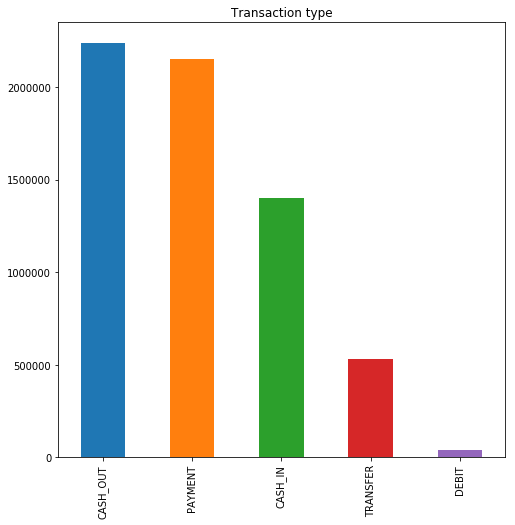

In [51]:
### Barchart to display Transaction count by Type
figure = plt.figure(figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type")
plt.show()


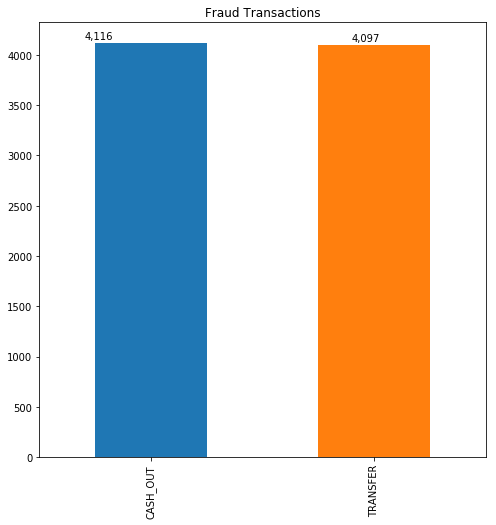

In [52]:
### Barchart to display Fraud count by Type
figure = plt.figure(figsize=(8, 8))
axis =df_fraud.type.value_counts().plot(kind='bar', title="Fraud Transactions")

for p in axis.patches:
    axis.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()*1.2, p.get_height()*1.01))
    
plt.show()

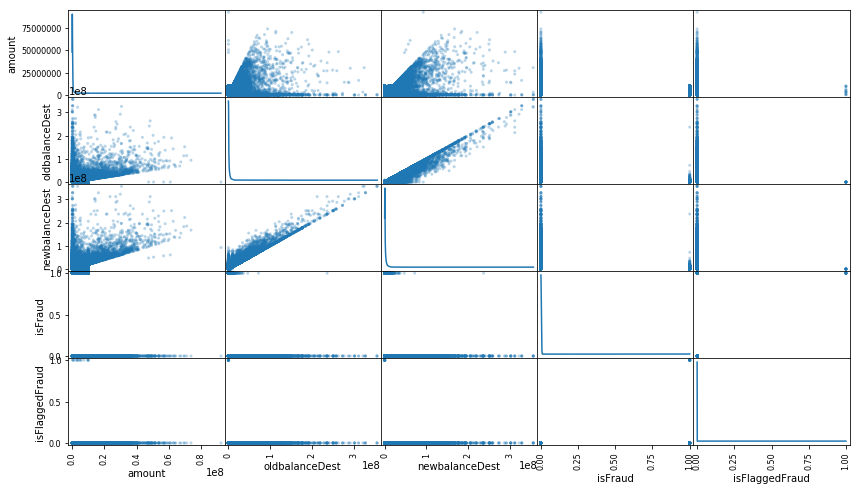

In [53]:
# Produce a scatter matrix for each pair of features in the data
data_trans_cashout = data[(data['type'] == 'TRANSFER') | (data['type'] == 'CASH_OUT')]
data_tmp = data_trans_cashout[['amount', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
#display(data_tmp.head)
pd.plotting.scatter_matrix(data_tmp, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


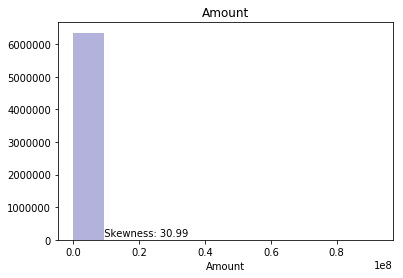

In [54]:
#Plot Amount Histogram
#pd.plotting.scatter_matrix(data[['amount']], alpha = 0.3, facecolor = 'blue', figsize = (8,4));
plt.hist(data['amount'], facecolor = 'darkblue',  alpha=0.3)
plt.title("Amount")
plt.xlabel("Amount")
plt.text(1000, 100000, "          Skewness: {0:.2f}".format(skew(data['amount'])))
plt.show()

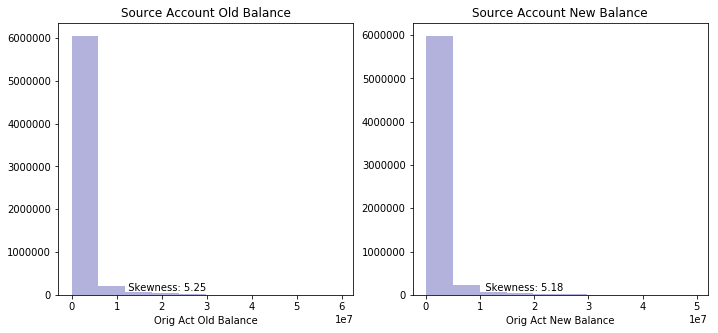

In [55]:
#Plot Origin account's Old Balance and new balance Histogram
figure = plt.figure(figsize=(18, 5))
figure.add_subplot(131) 
plt.hist(data['oldbalanceOrg'], facecolor = 'darkblue',  alpha=0.3)
plt.xlabel("Orig Act Old Balance")
plt.title("Source Account Old Balance")
plt.text(13, 100000, "                  Skewness: {0:.2f}".format(skew(data['oldbalanceOrg'])))

figure.add_subplot(132) 
plt.hist(data['newbalanceOrig'], facecolor = 'darkblue',  alpha=0.3)
plt.xlabel("Orig Act New Balance")
plt.title("Source Account New Balance")
plt.text(13, 100000, "                   Skewness: {0:.2f}".format(skew(data['newbalanceOrig'])))

plt.show()


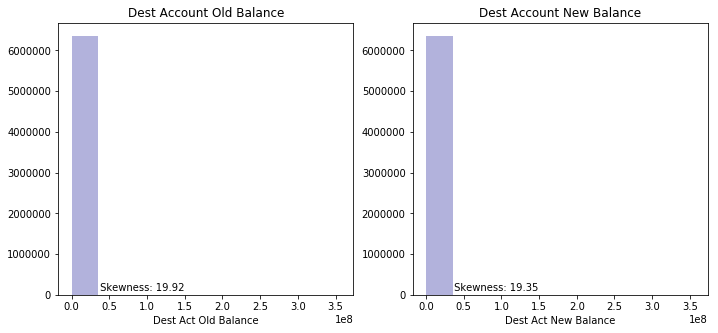

In [56]:
#Plot Dest Account's Old Balance and New balace Histogram
figure = plt.figure(figsize=(18, 5))
figure.add_subplot(131) 
plt.hist(data['oldbalanceDest'], facecolor = 'darkblue',  alpha=0.3)
plt.xlabel("Dest Act Old Balance")
plt.title("Dest Account Old Balance")
plt.text(13, 100000, "         Skewness: {0:.2f}".format(skew(data['oldbalanceDest'])))

figure.add_subplot(132) 
plt.hist(data['newbalanceDest'], facecolor = 'darkblue',  alpha=0.3)
plt.xlabel("Dest Act New Balance")
plt.title("Dest Account New Balance")
plt.text(13, 100000, "         Skewness: {0:.2f}".format(skew(data['newbalanceDest'])))

plt.show()

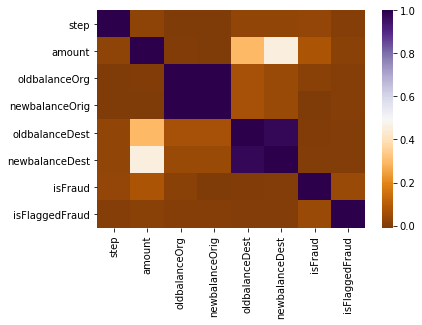

In [7]:
import seaborn as sns
# Calculate correlation between each pair of variable
corr_matrix=data.corr()
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')

### Data Preprocessing/cleanup

#### Delete Three Types of Records (PAYMENT, CASH_IN, DEBIT)
The data analysis and bar chart graphs clearly indicate that two types of data records (TRANSFER and CASH_OUT) contain Fraud transactions. The remaining three types (PAYMENT, CASH_IN and Debit) of records are Genuine transactions. Therefore, we can safely delete the remaining three types of records from the dataset and keep the first two types in the dataset for data processing. 

In [7]:
### Retreive TRANSFER and CASH_OUT records from dataset
df_transfer_cashout1 = data[(data['type'] == 'TRANSFER') | (data.type == 'CASH_OUT')].copy()
display(df_transfer_cashout1[:10])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0


#### Convert String to Integer: 
The Type column contains two types of string values either TRANSFER and CASH_OUT. Therefore, we can convert column from string to either 1 or 0. I have created a new column (c_type) to store the converted value. If the transaction type is “TRANSFER”, then assign 1 to c_type. If the transaction type is “CASH_OUT”, then assign 0 to c_type.
 

In [8]:
###Convert type column from String to Integer. The type consists of two columns only. Therefore, we could convert into 0s and 1s
df_transfer_cashout1['c_type'] = df_transfer_cashout1['type'].map(lambda x:  1 if(x == 'TRANSFER') else 0)
display(df_transfer_cashout1[:10])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,c_type
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0,1
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0,1


#### Delete Records with amount more than 10 Million
The data analysis indicates that there are 5,650 records exist in the dataset with the amount more than 10 Million. None of these records are classified as Fraud. It means, Amount with more than 10 Million are Genuine transactions. Therefore, we can delete records with amount more than 10 Millions from the dataset. 

In [9]:
###Delete rows which contains amount more than 10000000
print("Before deleting the records with amount more than 10 Millions:{}".format(len(df_transfer_cashout1)))
df_transfer_cashout2 = df_transfer_cashout1[df_transfer_cashout1.amount < 10000000]
print("After deleting the records with amount more than 10 Millions:{}".format(len(df_transfer_cashout2)))

Before deleting the records with amount more than 10 Millions:2770409
After deleting the records with amount more than 10 Millions:2764759


#### Logarithmic Normalization
The amount and balance column values are distributed between zero and millions. These columns should be normalized for accurate and effective prediction. Therefore, I have applied Logarithmic technique to the amount and balance columns. The Log of zero is infinite. I have changed amount and balance values from zero to 0.01 before applying Logarithmic function.  

In [10]:
###Normalization - Amout
df_transfer_cashout2['amount_norm'] = df_transfer_cashout2['amount'].map(lambda x:  0.01 if(x == 0) else x)
df_transfer_cashout2['amount_norm'] = np.log(df_transfer_cashout2['amount_norm'])

###Normalization - Origin oldbalance 
df_transfer_cashout2['oldbalanceOrg_norm'] = df_transfer_cashout2['oldbalanceOrg'].map(lambda x:  0.01 if(x == 0) else x)
df_transfer_cashout2['oldbalanceOrg_norm'] = np.log(df_transfer_cashout2['oldbalanceOrg_norm'])

###Normalization - Origin newbalance 
df_transfer_cashout2['newbalanceOrig_norm'] = df_transfer_cashout2['newbalanceOrig'].map(lambda x:  0.01 if(x == 0) else x)
df_transfer_cashout2['newbalanceOrig_norm'] = np.log(df_transfer_cashout2['newbalanceOrig_norm'])

###Normalization - Dest oldbalance 
df_transfer_cashout2['oldbalanceDest_norm'] = df_transfer_cashout2['oldbalanceDest'].map(lambda x:  0.01 if(x == 0) else x)
df_transfer_cashout2['oldbalanceDest_norm'] = np.log(df_transfer_cashout2['oldbalanceDest_norm'])

###Normalization - Dest newbalance 
#df_transfer_cashout2['newbalanceDest_norm'] = df_transfer_cashout2['newbalanceDest'].map(lambda x:  0.01 if(x == 0) else x)
#df_transfer_cashout2['newbalanceDest_norm'] = np.log(df_transfer_cashout2['newbalanceDest_norm'])

###Reset Dataframe Index
df_transfer_cashout2.reset_index(drop=True, inplace=True)
display(df_transfer_cashout2.head(10))

C:\Users\VM7634\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\VM7634\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\VM7634\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,c_type,amount_norm,oldbalanceOrg_norm,newbalanceOrig_norm,oldbalanceDest_norm
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,1,5.198497,5.198497,-4.60517,-4.605170
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,0,5.198497,5.198497,-4.60517,9.960907
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,0,12.342062,9.637241,-4.60517,8.533657
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0,1,12.279836,6.558198,-4.60517,10.017932
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0,1,12.649751,9.290537,-4.60517,8.743053
5,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0,0,11.611999,10.197850,-4.60517,12.573490
6,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0,0,10.949997,7.571484,-4.60517,11.159858
7,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0,0,8.584270,-4.605170,-4.60517,13.388776
8,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0,0,10.054546,9.923855,-4.60517,10.155879
9,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0,1,11.044693,11.278645,9.71131,6.248043


### Drop Columns
The source account name and destination name columns do not add much value to the Model. Therefore, I have decided to drop Name columns along with the pre-normalized data columns.

In [11]:
### New dataset after dropping the features, targetcolumn, isFlaggedFraud, type, and names
features_data = df_transfer_cashout2.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis = 1)
print("Feature data after dropping taget column and non-important columns ")
display(features_data[:10])

target_data = df_transfer_cashout2['isFraud']
#display(target_data[:10])

Feature data after dropping taget column and non-important columns 


,step,c_type,amount_norm,oldbalanceOrg_norm,newbalanceOrig_norm,oldbalanceDest_norm
0,1,1,5.198497,5.198497,-4.60517,-4.605170
1,1,0,5.198497,5.198497,-4.60517,9.960907
2,1,0,12.342062,9.637241,-4.60517,8.533657
3,1,1,12.279836,6.558198,-4.60517,10.017932
4,1,1,12.649751,9.290537,-4.60517,8.743053
5,1,0,11.611999,10.197850,-4.60517,12.573490
6,1,0,10.949997,7.571484,-4.60517,11.159858
7,1,0,8.584270,-4.605170,-4.60517,13.388776
8,1,0,10.054546,9.923855,-4.60517,10.155879
9,1,1,11.044693,11.278645,9.71131,6.248043


In [12]:
###Statistical Info
features_data.info()
display(features_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764759 entries, 0 to 2764758
Data columns (total 6 columns):
step                   int64
c_type                 int64
amount_norm            float64
oldbalanceOrg_norm     float64
newbalanceOrig_norm    float64
oldbalanceDest_norm    float64
dtypes: float64(4), int64(2)
memory usage: 126.6 MB


,step,c_type,amount_norm,oldbalanceOrg_norm,newbalanceOrig_norm,oldbalanceDest_norm
count,2.764759e+06,2.764759e+06,2.764759e+06,2.764759e+06,2.764759e+06,2.764759e+06
mean,2.418526e+02,1.907584e-01,1.191866e+01,3.102837e+00,-3.053960e+00,1.091009e+01
std,1.416932e+02,3.928991e-01,1.217969e+00,7.437745e+00,4.706038e+00,6.447011e+00
min,1.000000e+00,0.000000e+00,-4.605170e+00,-4.605170e+00,-4.605170e+00,-4.605170e+00
25%,1.550000e+02,0.000000e+00,1.132425e+01,-4.605170e+00,-4.605170e+00,1.175931e+01
50%,2.360000e+02,0.000000e+00,1.204860e+01,5.730100e+00,-4.605170e+00,1.322600e+01
75%,3.330000e+02,0.000000e+00,1.262989e+01,1.034184e+01,-4.605170e+00,1.436293e+01
max,7.430000e+02,1.000000e+00,1.611794e+01,1.759557e+01,1.759255e+01,1.969049e+01


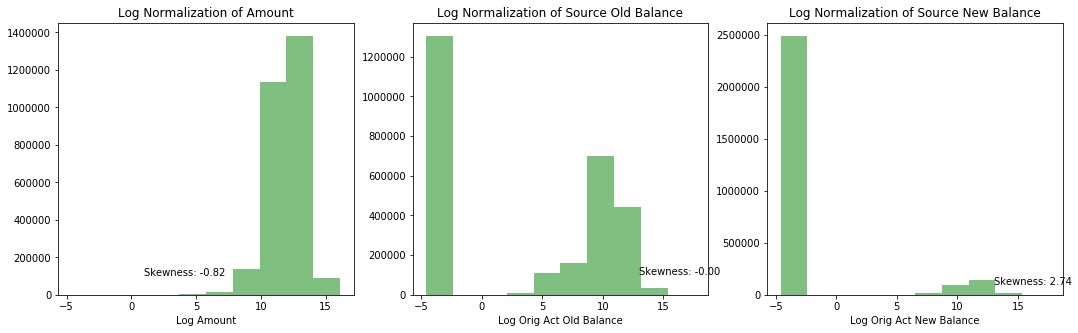

In [13]:
### Amount, old balance and new balance after normalizing the data
figure = plt.figure(figsize=(18, 5))
figure.add_subplot(131) 
plt.hist(features_data['amount_norm'], facecolor = 'green', alpha=0.5)
plt.xlabel("Log Amount")
plt.title("Log Normalization of Amount")
plt.text(1, 100000, "Skewness: {0:.2f}".format(skew(features_data['amount_norm'])))

figure.add_subplot(132) 
plt.hist(features_data['oldbalanceOrg_norm'], facecolor = 'green', alpha=0.5)
plt.xlabel("Log Orig Act Old Balance")
plt.title("Log Normalization of Source Old Balance")
plt.text(13, 100000, "Skewness: {0:.2f}".format(skew(features_data['oldbalanceOrg_norm'])))

figure.add_subplot(133) 
plt.hist(features_data['newbalanceOrig_norm'], facecolor = 'green', alpha=0.5)
plt.xlabel("Log Orig Act New Balance")
plt.title("Log Normalization of Source New Balance")
plt.text(13, 100000, "Skewness: {0:.2f}".format(skew(features_data['newbalanceOrig_norm'])))

plt.show()

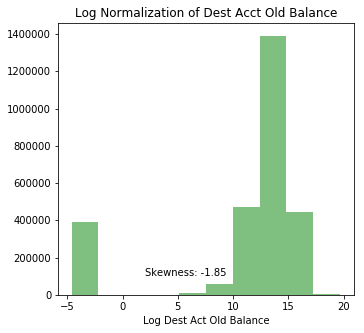

In [14]:
## Plot destination old blanace and destination new balance histograms
figure = plt.figure(figsize=(18, 5))
figure.add_subplot(131) 
plt.hist(features_data['oldbalanceDest_norm'], facecolor = 'green', alpha=0.5)
plt.xlabel("Log Dest Act Old Balance")
plt.title("Log Normalization of Dest Acct Old Balance")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(features_data['oldbalanceDest_norm'])))
'''
figure.add_subplot(132) 
plt.hist(features_data['newbalanceDest_norm'], facecolor = 'green', alpha=0.5)
plt.xlabel("Log Dest Act New Balance")
plt.title("Log Normalization of Dest Acct New Balance")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(features_data['newbalanceDest_norm'])))
'''
plt.show()

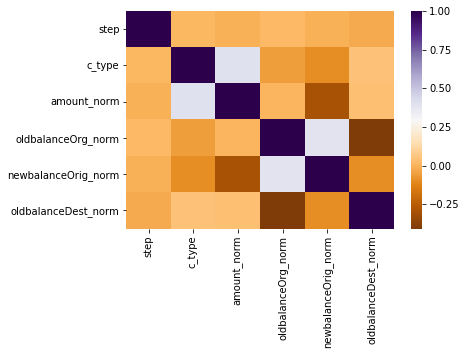

In [15]:
### Feature correlation after normalizing data
import seaborn as sns
# Calculate correlation between each pair of variable
corr_matrix=features_data.corr()
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')

## Implementation
### Split datasets
The next task is Model implementation. The features and target data have been split into training and testing datasets. I have allocated 80% of datasets randomly to the training data and remaining 20% of datasets. The training datasets are being utilized to train and tune the algorithm. The testing datasets are being utilized to evaluate the Model accuracy.  

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_data, 
                                                    target_data, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2211807 samples.
Testing set has 552952 samples.


## Naive Predictor
Assume that model has predicted all transactions as Fraud

In [17]:


total_records = len(features_data)
FP = np.sum(target_data) ###Fraud records
TP = total_records - FP #Total number of records minus Flase Positives
print("Total Records:",total_records)
print("False Positives:",FP)
print("True Positives:",TP)


FN = 0 # No predicted negatives in the naive case
TN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = (TP+FN)/(total_records)
recall =  TP/(TP+FN)
precision = TP/(TP+FP)

### ROC Metrics, TPR and FPR
###True Positive Rate is same as Recall
TPR = recall
### False Postive Rate
FPR =  FP / (FP+TN)

print("Accuracy:{:.4f}, Recall:{:.4f}, Precision:{:.4f}".format(accuracy, recall,precision))

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
beta_square = beta**2
fscore = (1+ beta_square) * ((precision * recall)/
                           ((beta_square*precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print("Naive Predictor ROC Metrics: TPR:{:.4f}, FPR:{:.4f}".format(TPR, FPR))


Total Records: 2764759
False Positives: 7926
True Positives: 2756833
Accuracy:0.9971, Recall:1.0000, Precision:0.9971
Naive Predictor: [Accuracy score: 0.9971, F-score: 0.9977]
Naive Predictor ROC Metrics: TPR:1.0000, FPR:1.0000


#### Common Function - Calculate ROC AUC
I have created a common function called “Calculate_roc_auc” that executes a given Models and applies hyper (tuning) parameters. The function evaluates and prints the Metrics, Recall and AUC.  I have implemented cross validation ShuffleSplit technique to set aside 20% of training datasets to the validation. I have also implemented GridSearchCV logic to determine best tuning parameters from hyperparameters list.  All supervised learning classifiers have invoked this Common function.  The function’s input attributes are as follows: <br>
- **Classifier:** the classifier model on which prediction is calculated
- **Parameters:** the hyper parameters applied to the Model
- **Score_type:** score that will be calculated, for example f-score
- **X_train:** Features training set
- **y_train:** Target data (fraud) training set
- **X_test:** Features testing set
- **y_test:** Target Data(fraud) testing set


In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV

import sklearn

def calculate_roc_auc(classifier, parameters, score_type, X_train, y_train, X_test, y_test ):
    '''
    inputs:
       - classifier: the classifier model on which prediction is calculated
       - parameters: the hyper parameters applied to the Model
       - score_type: score that will be calculated 
       - X_train: features training set
       - y_train: fraud training set
       - X_test: features testing set
       - y_test: fraud testing set
    '''
    start = time() # Get start time
    
    #print('The scikit-learn version is {}.'.format(sklearn.__version__))    
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state = 0)
              
    #print('Number of splits: {}.'.format(cv_sets.get_n_splits(X_train)))
    
    # Make an fbeta_score scoring object using make_scorer()
    #scorer = make_scorer(score_type, beta=0.5)

    # Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    best_obj = GridSearchCV(classifier, parameters, scoring=score_type, cv=cv_sets)
    #best_obj = RandomizedSearchCV(classifier, parameters, scoring='roc_auc', cv=cv_sets, n_iter=2)
    #print(grid_obj)
    
    # Fit the grid search object to the training data and find the optimal parameters using fit()
    best_fit = best_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = best_fit.best_estimator_

    print(classifier)
    print(best_clf)

    # Make predictions using the unoptimized and model
    reg_fit = classifier.fit(X_train, y_train)
    predictions = reg_fit.predict(X_test)
    
    # Make predictions using the optimized and model
    best_predictions = best_clf.predict(X_test)        
    
    ### Calculate ROC Score
    if hasattr(classifier, "decision_function"):
       reg_roc_score = reg_fit.decision_function(X_test)
       best_roc_socre = best_clf.decision_function(X_test)       
    else:
       reg_roc_score = reg_fit.predict_proba(X_test)[:, 1]
       best_roc_socre = best_clf.predict_proba(X_test)[:,1]

      
    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    #print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
    fpr_reg, tpr_reg, thresholds_reg = roc_curve(y_test, reg_roc_score)
    roc_auc_reg = auc(fpr_reg,tpr_reg)
    print("Final ROC AUC score on the testing data: {:.4f}".format(roc_auc_reg))
    
    print("\nOptimized Model\n------")
    #print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_roc_socre)
    roc_auc_best = auc(fpr_best,tpr_best)
    print("Final ROC AUC score on the testing data: {:.4f}".format(roc_auc_best))
    
    # Plot ROC Graph : Unoptimized and Optimzed Parameters
    figure = plt.figure(figsize=(18, 5))
    figure.add_subplot(131) 
    plt.title('UnOptimzed Receiver Operating Characteristic')
    plt.plot(fpr_reg, tpr_reg, 'b',label='AUC = %0.2f'% roc_auc_reg)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    figure.add_subplot(132) 
    plt.title('Optizmed Receiver Operating Characteristic')
    plt.plot(fpr_best, tpr_best, 'b',label='AUC = %0.2f'% roc_auc_best)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.show()
    
    # Calculate the training time
    end = time() # Get end time
    print("Execution Time:{}".format(end-start))
    

## Decision Tree Classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')
Unoptimized model
------
Final ROC AUC score on the testing data: 0.9206

Optimized Model
------
Final ROC AUC score on the testing data: 0.9955


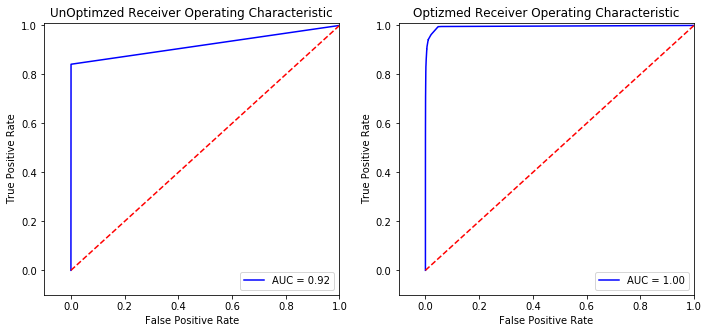

Execution Time:172.32099986076355


In [51]:
#Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=40)

# Create the parameters list you wish to tune, using a dictionary if needed.
#parameters = {'max_depth':[10,50,100,250,500,1000], 'min_samples_split':[100], 'min_samples_leaf':[100], 'criterion':['entropy']}
parameters = {'max_depth':[10], 'min_samples_split':[100], 'min_samples_leaf':[100],  
               "criterion": ['entropy']}

# Execute model and determine the roc_aoc
calculate_roc_auc(clf, parameters, 'roc_auc', X_train, y_train, X_test, y_test )

#### Decision Tree Results:



|   Max Depth  | Min_Samples_Split | Min Samples leaf| Criterion  | ROC-AOC   |  
| :----------: | :---------------: | :-------------: | :--------: | :--------:|
|     Default  |   Default(2)      |   Default(1)    |    gini    |   0.9206  | (Without tuning parameters) 
|      10      |      100          |    100          |    gini    |   0.9955  |  
|      50      |      100          |    100          |    gini    |   0.9872  |
|     100      |    1,000          |    100          |    gini    |   0.9891  |
|     100      |     100           |    100          |    gini    |   0.9872  |
|     1000     |    1,000          |    100          |    gini    |   0.9891  |
|      10      |      100          |    100          |    Entropy |   0.9955  |  
|      50      |      100          |    100          |    Entropy |   0.9926  |
|     100      |    1,000          |    100          |    Entropy |   0.9946  |

## Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=40, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=40, verbose=0, warm_start=False)
Unoptimized model
------
Final ROC AUC score on the testing data: 0.9691

Optimized Model
------
Final ROC AUC score on the testing data: 0.9973


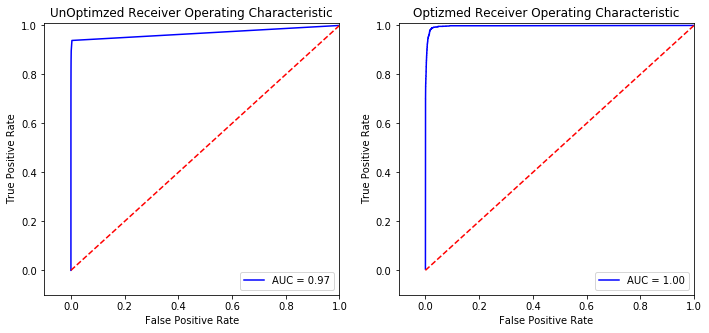

Execution Time:784.420000076294


In [54]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


# Initialize the classifier
clf = RandomForestClassifier(random_state=40)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators':[10], 'max_depth':[50], 'min_samples_split':[100], 'min_samples_leaf':[100], 'criterion':['gini']}

# Execute model and determine the roc_auc
calculate_roc_auc(clf, parameters, 'roc_auc', X_train, y_train, X_test, y_test )


#### Random Forest Model  Results:



|   Max Depth  | Min_Samples_Split | Min Samples leaf| Method    | n_estimators | Roc AUC |
| :----------: | :---------------: | :-------------: | :-------: |:------------:|:------: |
|     Default  |    Default(2)     |    Default(1)   |  Gini     |   10         | 0.9691  | (Without Parameter Tuning)
|      10      |      100          |    100          |  Entropy  |   10         | 0.9959  | 
|      50      |      100          |    100          |  Entropy  |   10         | 0.9971  |  
|      100     |      100          |    100          |  Entropy  |   10         | 0.9962  |  
|      10      |      100          |    100          |  Gini     |   10         | 0.9973  |
 

## Ensemble - Voting Classifier

C:\Users\VM7634\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy score on testing data: 0.9991
F-score on testing data: 0.8923
Final ROC AUC score on the testing data: 0.9977


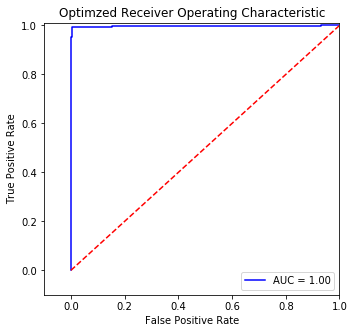

Execution Time:212.3879997730255


In [38]:
#Import ensemble, RandomFrest Classifier, Logistic Regression and Decision Tree Classifier
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifiers with optimized parameters
ens_rf = ensemble.RandomForestClassifier(n_estimators = 30, criterion = 'entropy', max_depth = 50, random_state = 42)
ens_dt = DecisionTreeClassifier(random_state=40, max_depth=50, min_samples_split=100, min_samples_leaf=100, criterion='entropy')
ens_lr = LogisticRegression(random_state=42, C=10,  penalty='l1', max_iter=10)
ens_KNC = KNeighborsClassifier(n_neighbors=20)

# Create the parameters list you wish to tune, using a dictionary if needed.
start = time() # Get start time
#ens_voting = ensemble.VotingClassifier(estimators = [('rf', ens_rf), ('dt', ens_dt), ('knc', ens_KNC)],
ens_voting = ensemble.VotingClassifier(estimators = [('rf', ens_rf), ('dt', ens_dt), ('lr', ens_lr)],
                                       voting='soft', n_jobs=10, weights = [5,4,1])

ens_fit = ens_voting.fit(X_train, y_train)
ens_predictions = ens_fit.predict(X_test)
ens_roc_scores =  ens_fit.predict_proba(X_test)[:,1]


print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, ens_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, ens_predictions, beta = 0.5)))
fpr_reg, tpr_reg, thresholds_reg = roc_curve(y_test, ens_roc_scores)
roc_auc_reg = auc(fpr_reg,tpr_reg)
print("Final ROC AUC score on the testing data: {:.4f}".format(roc_auc_reg))

# Plot ROC Graph : Optimzed Parameters
figure = plt.figure(figsize=(18, 5))
figure.add_subplot(131) 
plt.title('Optimzed Receiver Operating Characteristic')
plt.plot(fpr_reg, tpr_reg, 'b',label='AUC = %0.2f'% roc_auc_reg)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

# Calculate the training time
end = time() # Get end time
print("Execution Time:{}".format(end-start))

#### Voting Classifier Results

|  Class 1     | Class 2         | Class 3           | voting    |  Weights |ROC SCore| 
| :----------: | :-------------: | :---------------: | :-------: |:--------:|:-------:|
| RandomForest | Decision Tree   | Logistic Regresion|  Soft     |  5,4,2   | 0.9977  | 
| RandomForest | Decision Tree   | Logistic Regresion|  Soft     |  5,4,1   | 0.9977  | 
| RandomForest | Decision Tree   | KNeighbors        |  Soft     |  5,4,2   | 0.9975  | 
| RandomForest | Decision Tree   | KNeighbors        |  Soft     |  5,3,1   | 0.9975  | 
| RandomForest | Decision Tree   | KNeighbors        |  Soft     |  5,4,1   | 0.9975  | 

### Model Robustnees Analsys - Stratified K-Fold
The K-Fold algorithm is standard technique to evaluate the Machine Learning Model performance and robustness. The dataset has been split into K-parts (10). Each part of the dataset is called a “Fold”. The algorithm is Trained on k-1 folds and a remaining Fold is designated as “Test” dataset. The same process is repeated K times to execute each Fold as a Test dataset.  After executing algorithm K times, it provides K different scores (ROC-AOC numbers). Then, I have determined the mean and standard deviation of ROC-AOC scores. I have implemented Stratified K-Fold cross validation to ensure that the class distribution

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def validate_robustness(classifier, X_features, y_target):
    '''
    inputs:
       - classifier: the classifier model on which prediction is calculated
       - X_features: entire features data set
       - y_target: entire target dataset 
    '''
    
    ### Define local variables
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    start = time() # Get start time
    print("StratifiedKFold analysis")
    kfoldval = StratifiedKFold(n_splits=10)
    
    plt.rcParams["figure.figsize"] = (10,8)
    iteration = 0
    for train_index, validate_index in kfoldval.split(X_features, y_target):
        #Classifir fit and predict roc_score
        classifier_fit = classifier.fit(X_features.iloc[train_index], y_target.iloc[train_index])
        robust_roc_score = classifier_fit.predict_proba(X_features.iloc[validate_index])[:,1]
         
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_target.iloc[validate_index], robust_roc_score)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        print('ROC fold %d (AUC = %0.2f)' % (iteration, roc_auc))
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (iteration, roc_auc))

        iteration += 1
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Average', alpha=.8)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic - StratifiedKfold')
    plt.legend(loc="lower right")
    plt.show()



StratifiedKFold analysis
ROC fold 0 (AUC = 0.98)
ROC fold 1 (AUC = 0.95)
ROC fold 2 (AUC = 0.98)
ROC fold 3 (AUC = 0.84)
ROC fold 4 (AUC = 0.95)
ROC fold 5 (AUC = 0.99)
ROC fold 6 (AUC = 1.00)
ROC fold 7 (AUC = 1.00)
ROC fold 8 (AUC = 0.99)
ROC fold 9 (AUC = 0.99)


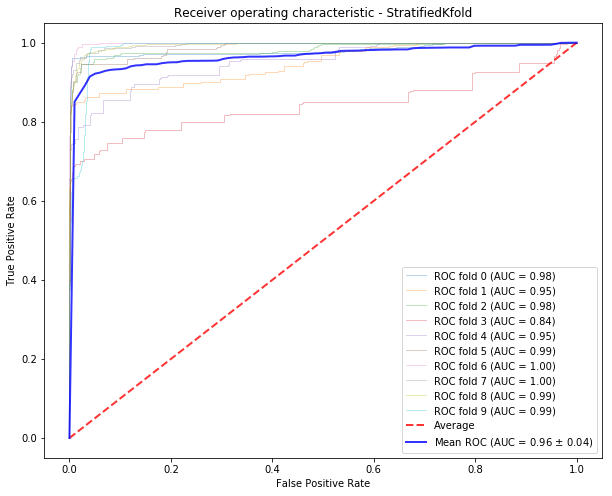

In [37]:
### Validate Model Robustness with Stratified K-Fold 
validate_robustness(ens_voting, features_data, target_data)

### Conclusion
The capstone project provided opportunity to demonstrate the skills and knowledge achieved from Machine Learning Engineering nanodegree. The project tasks and activities can be summarized as given below:
1.	Identified project objective, scope, and public dataset. 
2.	Downloaded dataset from Kaggle website  
3.	Decided to implement Supervised Learning Classifier algorithms
4.	A benchmark was created for the classifier
5.	Analyzed the Dataset which contains more than 6 million records. 
6.	Created visual diagrams like Histograms and bar charts. 
7.	Selected the features which have high impact 
8.	Converted string to integrate and Normalized the data
9.	Executed Five standalone algorithms and one ensemble algorithm
10.	Tuned the algorithms by modifying hyperparameters. 
11.	 Identified the best suitable algorithm after comparing the Accuracy and F-score. 

I found step 5 and 7 are most tedious and time-consuming activities. I had to analyze the fraud activity records and identified the fraud pattern. In my analysis, Fraudulent activity was executed with two types of transactions, PAYMENT and CASH_IN. <br> <br>
	The interesting aspects of project is, Ensemble Voting Classifier which takes multiple other classifiers and combines into a hybrid classifier. The Voting Classifier F-score is higher compere to other classifiers.  <br> <br>
The common function from the program can be reused for other projects easily. The common function was written as independent function can be utilized for other projects.
